In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow.keras as keras


In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [70]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [71]:
df.shape

(918, 12)

In [72]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [74]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [75]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

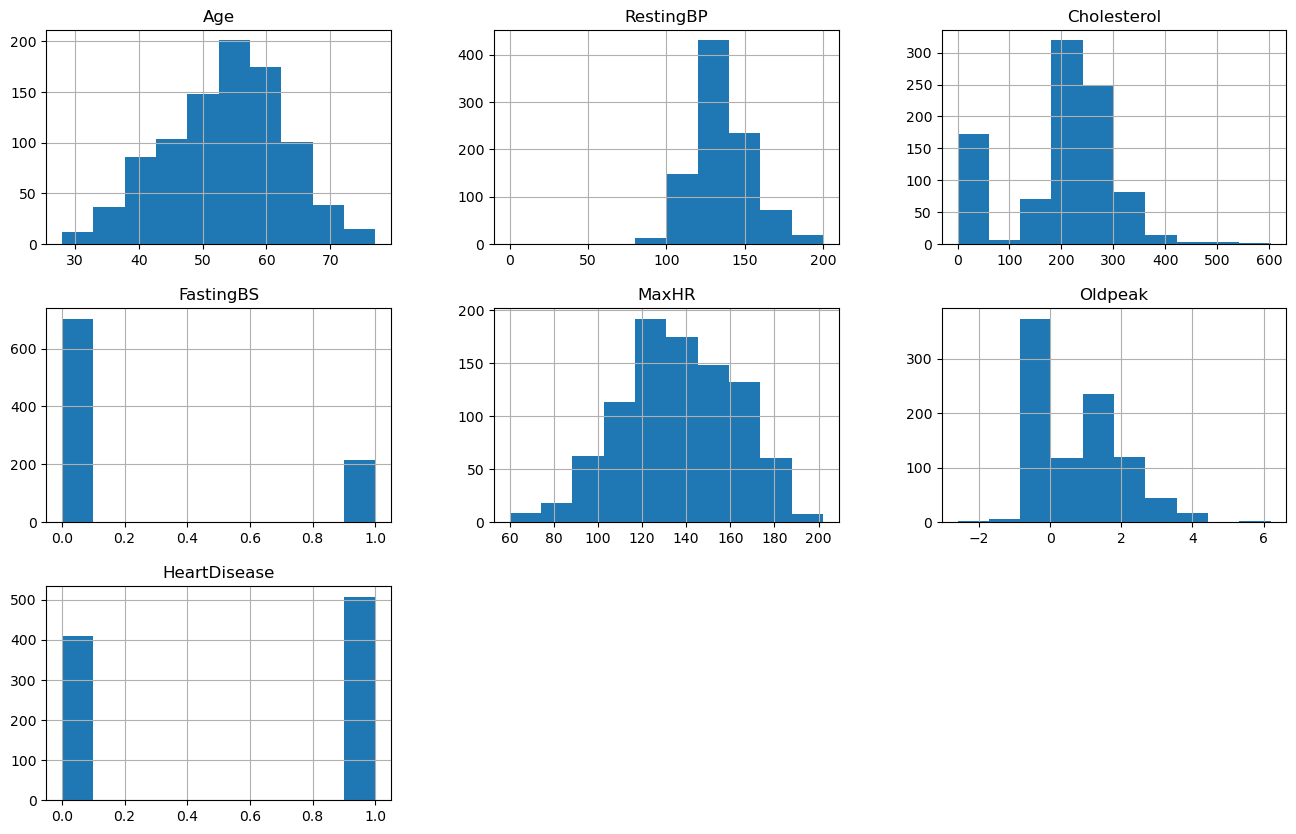

In [76]:
hist = df.hist(bins=10, figsize=(16,10))


In [77]:
categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [78]:
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
input_dim = X_train.shape[1]

print(f"Modelin giriş boyutu (input_dim) : {input_dim}")
print(f"X_train'in sütun sayısı : {X_train.shape[1]}")

# Model oluşturdum
model = Sequential()
model.add(keras.Input(shape=(input_dim,)))
# Diğer katmanlar
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(1, activation='sigmoid'))




model.summary()

Modelin giriş boyutu (input_dim) : 15
X_train'in sütun sayısı : 15


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 256)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,121 (145.00 KB)

 Trainable params: 37,121 (145.00 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
input_dim = X_train.shape[1]
print(f"Yeni input_dim: {input_dim}")

Yeni input_dim: 15


In [97]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [104]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=20)

In [105]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8056 - loss: 0.4385 - val_accuracy: 0.7347 - val_loss: 0.5841
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7844 - loss: 0.4873 - val_accuracy: 0.7415 - val_loss: 0.5936
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7944 - loss: 0.4818 - val_accuracy: 0.7347 - val_loss: 0.5891
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7742 - loss: 0.4740 - val_accuracy: 0.7415 - val_loss: 0.5902
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7805 - loss: 0.4754 - val_accuracy: 0.7415 - val_loss: 0.5738
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8072 - loss: 0.4538 - val_accuracy: 0.7415 - val_loss: 0.5747
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8066 - loss: 0.4523 - val_accuracy: 0.7347 - val_loss: 0.5893
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8172 - loss: 0.4294 - val_accuracy: 0.7415 - va

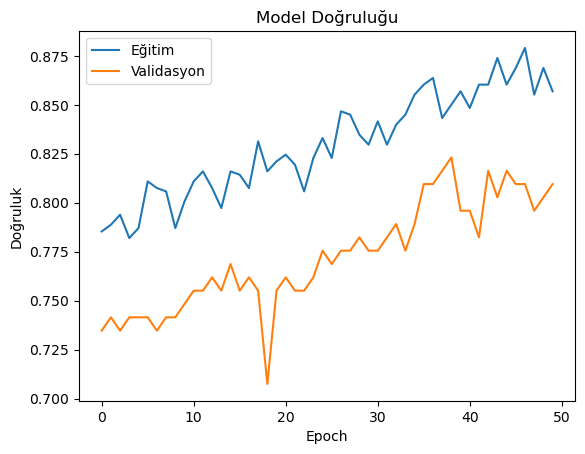

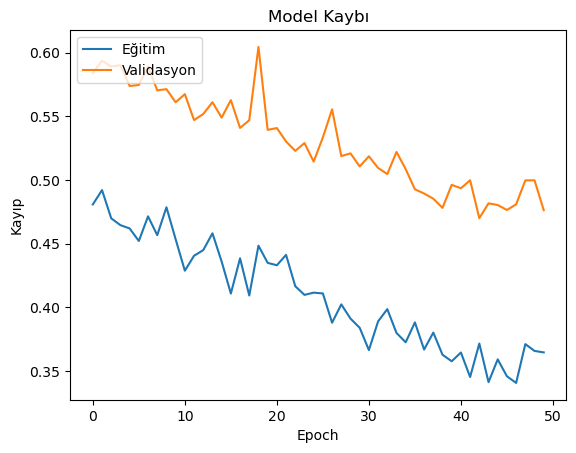

In [106]:
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Validasyon'], loc='upper left')
plt.show()

# Kayıp grafiği
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Validasyon'], loc='upper left')
plt.show()

In [107]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test verisi üzerinde kayıp (loss): {loss:.4f}")
print(f"Test verisi üzerinde doğruluk (accuracy): {accuracy*100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8354 - loss: 0.3723
Test verisi üzerinde kayıp (loss): 0.4151
Test verisi üzerinde doğruluk (accuracy): 82.07%


In [108]:
from sklearn.metrics import classification_report

# Modelin tahminlerini aldım
y_pred_proba = model.predict(X_test)

# Tahmin olasılıklarını ikili (binary) sınıflara dönüştürdüm (0 veya 1)
# Genellikle 0.5 eşik değeri kullanılırız
y_pred = (y_pred_proba > 0.5).astype(int)

# Sınıflandırma raporunu yazdırdım
print(classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        85
           1       0.80      0.89      0.84        99

    accuracy                           0.82       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



In [116]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [117]:
y_pred_proba = model.predict(X_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [118]:
y_pred_proba_flat = y_pred_proba.flatten()


In [122]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_flat)
roc_auc = auc(fpr, tpr)


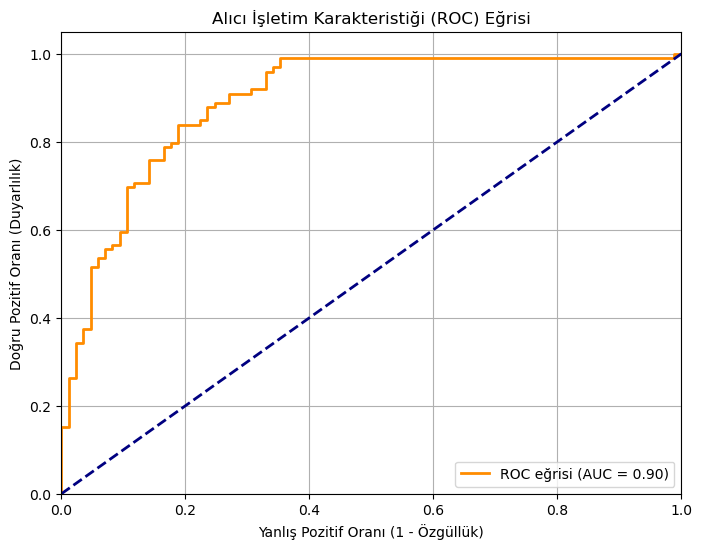

In [123]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC eğrisi (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (1 - Özgüllük)')
plt.ylabel('Doğru Pozitif Oranı (Duyarlılık)')
plt.title('Alıcı İşletim Karakteristiği (ROC) Eğrisi')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [124]:
print(f"Modelin AUC Değeri: {roc_auc:.2f}")


Modelin AUC Değeri: 0.90
